___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Полиномиальная регрессия в SciKit-Learn

Ранее мы видели, как можно построить простую линию тренда. В этой лекции мы значительно расширим спектр наших знаний - поговорим о переобучении (overfitting), недообучении (underfitting), оценке модели, а также об использовании нескольких признаков!

## Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Мы будем использовать данные из книги ISLR (Introduction to Statistical Learning: With Applications in R). Это будут продажи определённого продукта (в тысячах единиц), как функция от бюджета рекламы на ТВ, радио и в газетах (в тысячах долларов).

In [9]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# Берём все колонки, КРОМЕ sales
X = df.drop('sales', axis=1)
y = df['sales']

## SciKit Learn 

---

## Полиномиальная регрессия

**Прежде всего импортируем из Preprocessing класс PolynomialFeatures. С его помощью мы трансформируем наши исходные данные, добавляя в них полиномиальные признаки.**

Мы перейдём от уравнения в следующей форме (здесь показан случай, когда у нас только один признак x):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

и добавим дополнительные признаки на основе исходного признака x для полинома некоторой степени *d*.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Далее мы применим линейную регрессию, поскольку по сути мы можем воспринимать эти полиномиальные признаки x^2, x^3, ... x^d как новые признаки. Конечно, нам нужно аккуратно выбрать правильное значение *d*, степень нашей модели. Наши метрики оценки модели помогут нам в этом!

**Также нужно заметить, что когда у нас есть несколько признаков на основе признака X, то метод PolynomialFeatures также будет рассматривать *комбинации* признаков. Например, если на входе мы имеем два измерения в виде [a, b], то полином второй степени имеет следующие признаки: [1, a, b, a^2, ab, b^2].**

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# Метод Converter "обучается" на данных, в данном случае, на основе всех колонок X
# Затем этот метод выполняет трансформацию и выдаёт на выходе новые полиномиальные данные

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
polynomial_converter.fit(X)
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [22]:
# а можно сразу 
poly_features = polynomial_converter.fit_transform(X)

In [15]:
poly_features.shape

(200, 9)

In [16]:
X.shape

(200, 3)

In [17]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [18]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [19]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [26]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

Комбинации признаков $$x_1  \cdot x_2 \text{  и  } x_1  \cdot x_3 \text{  и  }   x_2  \cdot x_3 $$

In [27]:
230.1*37.8

8697.779999999999

In [28]:
230.1*69.2

15922.92

In [29]:
37.8*69.2

2615.7599999999998

## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

Посмотрите видео-лекции про обзор машинного обучения и обучение с учителем (Supervised Learning), там мы рассказываем, зачем нужен этот шаг.

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

### Модель для обучения на полиномиальных данных

#### Создаём экземпляр модели с параметрами

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Обучаем (Fit/Train) модель на обучающих данных

**Обучение следует проводить не на всех данных, а только на обучающих данных; тогда у нас будет возможность оценить работу модели на тестовых данных, чтобы проверить её способность работать с неизвестными данными в будущем.**

In [25]:
model.fit(X_train,y_train)

LinearRegression()


-----

## Оценка работы модели на тестовых данных

### Вычисляем производительность на тестовых данных

Чтобы корректно оценить работу модели, мы вычисляем метрики на тестовом наборе данных (это те данные, которые модель никогда не видела в процессе обучения).

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 0.4896798044803513
MSE: 0.44175055104033334
RMSE: 0.6646431757268958


In [29]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [32]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [38]:
df['sales'].mean()

np.float64(14.0225)

### Сравнение с простой линейной регрессией

**Результаты на тестовом наборе данных (замечание: для правильного сравнения следует использовать одно и то же разбиение данных на обучающую и тестовую выборки!)**

* Простая линейная регрессия:
    * MAE: 1.213
    * RMSE: 1.516

* Полиномиальная регрессия 2й степени:
    * MAE: 0.4896
    * RMSE: 0.664

---
---
## Выбираем модель

### Подбор параметров

Нравится ли нам точность модели? Может быть, более высокая степень полинома ещё больше улучшит результаты? Но не будет ли так, что большие значения степени будут слишком большими? Давайте посмотрим на дальнейшие степени полиномов, каждый раз смотря на ошибки предсказания. В итоге мы как раз придём к дискуссии про переобученность модели (overfitting).

Давайте с помощью цикла for сделаем следующее:

1. Создадим полиномиальные данные некоторой степени для данных X
2. Разобъём полиномиальные данные для обучающий и тестовый наборы данных
3. Выполним обучение модели на обучающем наборе данных
4. Посчитаем метрики на обучающем *и* тестовом наборе данных
5. Нанесём эти данные на график, чтобы увидеть момент переобучения модели

In [33]:
# Ошибка на обучающем наборе для той или иной степени полинома
train_rmse_errors = []
# Ошибка на тестовом наборе для той или иной степени полинома
test_rmse_errors = []

for d in range(1,10):
    
    # Создаём полиномиальные данные для степени "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Вычисляем ошибки
    
    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Добавляем ошибки в список для последующего нанесения на график
       
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [34]:
plt.plot()

[np.float64(1.734594124329376), np.float64(0.5879574085292233), np.float64(0.4339344356902068), np.float64(0.3517083688399347), np.float64(0.25093429694811553), np.float64(0.2095372870366497), np.float64(0.2204686011421281), np.float64(0.2714978811502994), np.float64(0.5132043099216381)]
[np.float64(1.5161519375993877), np.float64(0.6646431757268958), np.float64(0.580328682522652), np.float64(0.5077742648695357), np.float64(2.5758251972979704), np.float64(9.871422796209963), np.float64(41.32999073319802), np.float64(3103.1636448381573), np.float64(12768.34948166156)]


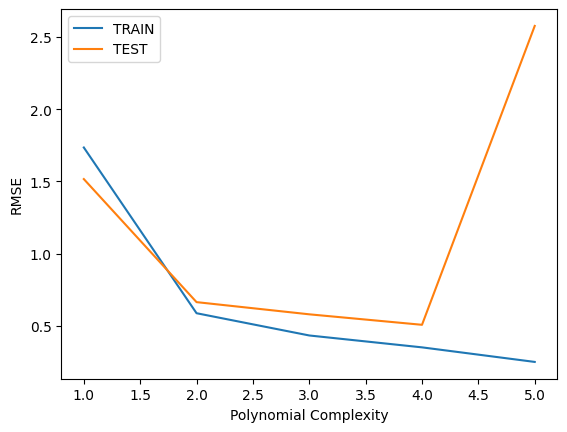

In [38]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

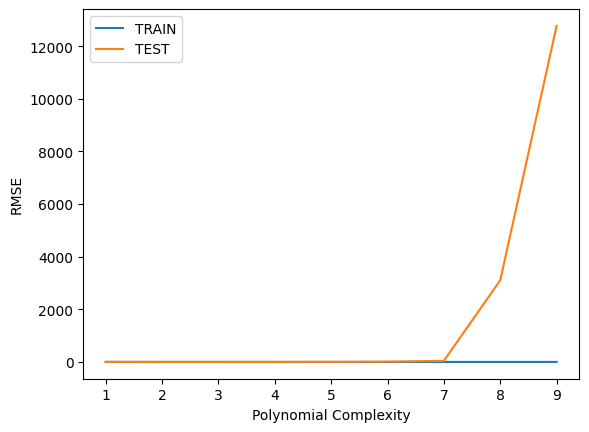

In [41]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

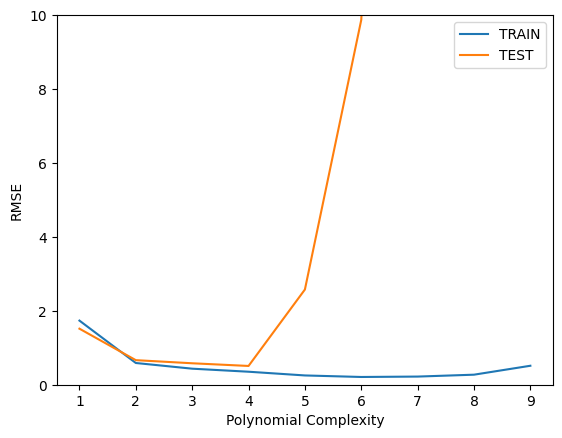

In [39]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,10)
plt.legend()

## Финальный выбор модели

Здесь нам нужно сохранить 2 вещи - объект создания полиномиальных признаков, а также саму модель. Дальнейшие шаги будут следующие:

1. Выбираем финальные значения параметров на основе тестовых метрик
2. Выполняем повторное обучение на всех данных
3. Сохраняем объект Polynomial Converter
4. Сохраняем модель

In [40]:
# На нашем графике видно, что мы могли бы выбрать и значение degree=4, однако безопаснее взять чуть меньшую степень сложности

final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)
final_linear_model = LinearRegression()

full_converted_X = final_poly_converter.fit_transform(X)

final_linear_model.fit(full_converted_X,y)

LinearRegression()

In [45]:
# можно и так
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

### Сохраняем модель и объект converter

In [42]:
from joblib import dump, load

dump(final_linear_model, 'sales_poly_model.joblib') # Сохраняем модель регрессии 
dump(final_poly_converter,'poly_converter.joblib') # Сохраняем полиномы

['poly_converter.joblib']

## Внедрение модели и предсказания

### Предсказания на новых данных

Вспомните, что нам нужно **сконвертировать** новые входящие данные в полиномиальные данные, поскольку именно на таких данных мы обучали нашу модель. Мы можем загрузить ранее сохранённый объект converter и просто вызвать метод **.transform()** на новых данных, поскольку нам не нужно выполнять обучение на новых данных.

**В нашей следующей рекламной кампании мы планируем потратить 149k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах. Сколько единиц товара мы ожидаем продать в результате такой рекламы?**

In [43]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

campaign = [[149,22,12]]
campaign_poly = loaded_poly.transform(campaign)
campaign_poly

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

Сравнение обычной линейной регрессии и Полиномиальной

In [46]:
simple_lin_model = LinearRegression()
simple_lin_model.fit(X,y)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [47]:
simple_lin_model.predict(campaign)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [45]:
loaded_model.predict(campaign_poly)

array([14.64501014])

-----
---